<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 9.5: Working with Text
- Using [NLTK](http://www.nltk.org) (Natural Language Toolkit)
- Using [spaCy](https://spacy.io)

INSTRUCTIONS:
- Run the cells
- Observe and understand the results
- Answer the questions

### Import libraries

In [23]:
## Import Libraries
%matplotlib inline
import matplotlib.pyplot as plt
from collections import Counter
import re as re
import seaborn as sns

import spacy

### Load data

In [24]:
## Loading the data

input_file = 'dat/ncc-1701-D.txt'

with open(input_file, 'r') as f:
    text = f.read()

## Inspect the data

In [25]:
print(text[:1000])

USS Enterprise (NCC-1701-D)

"For five hundred years, every ship that has borne the name of the Enterprise has become a legend. This one is no different."

The USS Enterprise (NCC-1701-D) was a 24th century United Federation of Planets Galaxy Class starship operated by Starfleet, and the fifth Federation ship to bear the name Enterprise. During her career, the Enterprise served as the Federation flagship. The Enterprise was destroyed during the Battle of Veridian III in 2371.

==History==
===Construction and launch===
The Enterprise was built at Utopia Planitia Fleet Yards orbiting Mars in the Solar system. The construction was a massive undertaking, involving thousands of people across disciplines. Construction was supervised by Commander Orfil Quinteros. Dr. Leah Brahms was responsible for much of the Enterprise's warp propulsion system design. Some of the Enterprise's components were derived from technology originally developed on the USS Pegasus.

One of the ship's nacelle tube was

### Work the data
- if necessary or desired
    - remove text or content, e.g. quotes (") or metadata (===)
    - remove or convert special symbols, e.g. "é" to "e"
    - remove or convert emoticons

In [26]:
regex_patt = re.compile('["=(),.\s]+')
print(regex_patt.sub(' ', text))

USS Enterprise NCC-1701-D For five hundred years every ship that has borne the name of the Enterprise has become a legend This one is no different The USS Enterprise NCC-1701-D was a 24th century United Federation of Planets Galaxy Class starship operated by Starfleet and the fifth Federation ship to bear the name Enterprise During her career the Enterprise served as the Federation flagship The Enterprise was destroyed during the Battle of Veridian III in 2371 History Construction and launch The Enterprise was built at Utopia Planitia Fleet Yards orbiting Mars in the Solar system The construction was a massive undertaking involving thousands of people across disciplines Construction was supervised by Commander Orfil Quinteros Dr Leah Brahms was responsible for much of the Enterprise's warp propulsion system design Some of the Enterprise's components were derived from technology originally developed on the USS Pegasus One of the ship's nacelle tube was the site of a multiple murder-suic

In [27]:
text = regex_patt.sub(' ', text)

In [28]:
print(text[:1000])

USS Enterprise NCC-1701-D For five hundred years every ship that has borne the name of the Enterprise has become a legend This one is no different The USS Enterprise NCC-1701-D was a 24th century United Federation of Planets Galaxy Class starship operated by Starfleet and the fifth Federation ship to bear the name Enterprise During her career the Enterprise served as the Federation flagship The Enterprise was destroyed during the Battle of Veridian III in 2371 History Construction and launch The Enterprise was built at Utopia Planitia Fleet Yards orbiting Mars in the Solar system The construction was a massive undertaking involving thousands of people across disciplines Construction was supervised by Commander Orfil Quinteros Dr Leah Brahms was responsible for much of the Enterprise's warp propulsion system design Some of the Enterprise's components were derived from technology originally developed on the USS Pegasus One of the ship's nacelle tube was the site of a multiple murder-suic

### Helper method

In [29]:
# create a bar chart of the frequency of the words in the text
def plot_words(tokens, top = 30):
    tokens_counter = Counter(tokens)
    tok = [t for (t, _) in tokens_counter.most_common()]
    val = [v for (_, v) in tokens_counter.most_common()]

    plt.figure(figsize = (16, 6))
    plt.bar(tok[:top], val[:top])
    plt.title('Number of terms: %d' % len(tokens_counter))
    plt.xticks(rotation = 90)

    plt.show()

### spaCy model invocation and text processing
spaCy does the processing of the text as part of the reading of the data.

In [30]:
# load spaCy and the English model
nlp = spacy.load("en_core_web_lg")

# process the text
doc = nlp(text)

In [31]:
tokens_counter = Counter(doc)
tok = [t for (t, _) in tokens_counter.most_common()]
val = [v for (_, v) in tokens_counter.most_common()]

In [32]:
(tok[:5], val[:5])

([USS, Enterprise, NCC-1701, -, D], [1, 1, 1, 1, 1])

In [ ]:
plt.figure(figsize = (16, 6))
plt.bar(tok[:5], val[:5])
#plt.title('Number of terms: %d' % len(tokens_counter))

### Tokenise

In [34]:
for token in doc:
    print(f"token:{token}\t tag:{token.tag_}\t\tPOS:{token.pos_}\t text:'{token.text}' \tlemma:{token.lemma_}")

token:USS	 tag:NNP		POS:PROPN	 text:'USS' 	lemma:USS
token:Enterprise	 tag:NNP		POS:PROPN	 text:'Enterprise' 	lemma:Enterprise
token:NCC-1701	 tag:NNP		POS:PROPN	 text:'NCC-1701' 	lemma:NCC-1701
token:-	 tag:HYPH		POS:PUNCT	 text:'-' 	lemma:-
token:D	 tag:NNP		POS:PROPN	 text:'D' 	lemma:D
token:For	 tag:IN		POS:ADP	 text:'For' 	lemma:for
token:five	 tag:CD		POS:NUM	 text:'five' 	lemma:five
token:hundred	 tag:CD		POS:NUM	 text:'hundred' 	lemma:hundred
token:years	 tag:NNS		POS:NOUN	 text:'years' 	lemma:year
token:every	 tag:DT		POS:DET	 text:'every' 	lemma:every
token:ship	 tag:NN		POS:NOUN	 text:'ship' 	lemma:ship
token:that	 tag:WDT		POS:DET	 text:'that' 	lemma:that
token:has	 tag:VBZ		POS:AUX	 text:'has' 	lemma:have
token:borne	 tag:VBN		POS:VERB	 text:'borne' 	lemma:bear
token:the	 tag:DT		POS:DET	 text:'the' 	lemma:the
token:name	 tag:NN		POS:NOUN	 text:'name' 	lemma:name
token:of	 tag:IN		POS:ADP	 text:'of' 	lemma:of
token:the	 tag:DT		POS:DET	 text:'the' 	lemma:the
token:Enterpri

In [35]:
# Display tag alongside the text
from spacy import displacy
 
displacy.render(doc, style='ent', jupyter=True)

In [36]:
for ent in doc.ents:
    print(f"Entity: {ent.text} \t\t type:{ent.label_}")

Entity: five hundred years 		 type:DATE
Entity: Enterprise 		 type:ORG
Entity: The USS Enterprise NCC-1701-D 		 type:PRODUCT
Entity: United Federation of Planets Galaxy Class 		 type:ORG
Entity: Starfleet 		 type:ORG
Entity: Enterprise 		 type:ORG
Entity: Enterprise 		 type:ORG
Entity: the Battle of Veridian III 		 type:EVENT
Entity: Enterprise 		 type:ORG
Entity: Utopia Planitia Fleet Yards 		 type:ORG
Entity: Mars 		 type:LOC
Entity: Solar 		 type:FAC
Entity: thousands 		 type:CARDINAL
Entity: Orfil Quinteros 		 type:PERSON
Entity: Leah Brahms 		 type:PERSON
Entity: Enterprise 		 type:ORG
Entity: Enterprise 		 type:ORG
Entity: the USS Pegasus One 		 type:PRODUCT
Entity: Utopia Planitia 		 type:FAC
Entity: Walter Pierce 		 type:PERSON
Entity: two 		 type:CARDINAL
Entity: Marla Finn 		 type:PERSON
Entity: William Hodges 		 type:PERSON
Entity: Pierce 		 type:ORG
Entity: 40759 5 in the year 		 type:DATE
Entity: 2363 		 type:CARDINAL
Entity: Enterprise 		 type:ORG
Entity: Mars 		 type:LOC

In [37]:
for chunk in doc.noun_chunks:
    print(f"Text:{chunk.text},\t label:{chunk.label_},\t root:{chunk.root.text}")

Text:USS Enterprise NCC-1701-D,	 label:NP,	 root:D
Text:five hundred years,	 label:NP,	 root:years
Text:every ship,	 label:NP,	 root:ship
Text:the name,	 label:NP,	 root:name
Text:the Enterprise,	 label:NP,	 root:Enterprise
Text:a legend,	 label:NP,	 root:legend
Text:This one,	 label:NP,	 root:one
Text:The USS Enterprise NCC-1701-D,	 label:NP,	 root:D
Text:a 24th century,	 label:NP,	 root:century
Text:United Federation,	 label:NP,	 root:Federation
Text:Planets Galaxy Class starship,	 label:NP,	 root:starship
Text:Starfleet,	 label:NP,	 root:Starfleet
Text:the fifth Federation ship,	 label:NP,	 root:ship
Text:the name Enterprise,	 label:NP,	 root:Enterprise
Text:her career,	 label:NP,	 root:career
Text:the Enterprise,	 label:NP,	 root:Enterprise
Text:the Federation flagship,	 label:NP,	 root:flagship
Text:The Enterprise,	 label:NP,	 root:Enterprise
Text:the Battle,	 label:NP,	 root:Battle
Text:Veridian III,	 label:NP,	 root:III
Text:2371 History Construction,	 label:NP,	 root:Constructi

In [38]:
displacy.render(doc, style='dep', jupyter=True, options={'distance': 90})

In [39]:
# only show the results
# spaCy has done it already
for i, t in enumerate(doc):
    print('%2d| %r' % (i+1, t.text))
    if t.text == '.':
        break

 1| 'USS'
 2| 'Enterprise'
 3| 'NCC-1701'
 4| '-'
 5| 'D'
 6| 'For'
 7| 'five'
 8| 'hundred'
 9| 'years'
10| 'every'
11| 'ship'
12| 'that'
13| 'has'
14| 'borne'
15| 'the'
16| 'name'
17| 'of'
18| 'the'
19| 'Enterprise'
20| 'has'
21| 'become'
22| 'a'
23| 'legend'
24| 'This'
25| 'one'
26| 'is'
27| 'no'
28| 'different'
29| 'The'
30| 'USS'
31| 'Enterprise'
32| 'NCC-1701'
33| '-'
34| 'D'
35| 'was'
36| 'a'
37| '24th'
38| 'century'
39| 'United'
40| 'Federation'
41| 'of'
42| 'Planets'
43| 'Galaxy'
44| 'Class'
45| 'starship'
46| 'operated'
47| 'by'
48| 'Starfleet'
49| 'and'
50| 'the'
51| 'fifth'
52| 'Federation'
53| 'ship'
54| 'to'
55| 'bear'
56| 'the'
57| 'name'
58| 'Enterprise'
59| 'During'
60| 'her'
61| 'career'
62| 'the'
63| 'Enterprise'
64| 'served'
65| 'as'
66| 'the'
67| 'Federation'
68| 'flagship'
69| 'The'
70| 'Enterprise'
71| 'was'
72| 'destroyed'
73| 'during'
74| 'the'
75| 'Battle'
76| 'of'
77| 'Veridian'
78| 'III'
79| 'in'
80| '2371'
81| 'History'
82| 'Construction'
83| 'and'
84| 'lau

In [40]:
from spacy.lang.en.stop_words import STOP_WORDS

filtered_text =[] 
token_list = []
for token in doc:
    token_list.append(token.text)
for word in token_list:
    lexeme = nlp.vocab[word]
    if lexeme.is_stop == False:
        filtered_text.append(word)
print(f"Token list: \n{token_list}")
print(f"\nFiltered text: \n{filtered_text}")

Token list: 
['USS', 'Enterprise', 'NCC-1701', '-', 'D', 'For', 'five', 'hundred', 'years', 'every', 'ship', 'that', 'has', 'borne', 'the', 'name', 'of', 'the', 'Enterprise', 'has', 'become', 'a', 'legend', 'This', 'one', 'is', 'no', 'different', 'The', 'USS', 'Enterprise', 'NCC-1701', '-', 'D', 'was', 'a', '24th', 'century', 'United', 'Federation', 'of', 'Planets', 'Galaxy', 'Class', 'starship', 'operated', 'by', 'Starfleet', 'and', 'the', 'fifth', 'Federation', 'ship', 'to', 'bear', 'the', 'name', 'Enterprise', 'During', 'her', 'career', 'the', 'Enterprise', 'served', 'as', 'the', 'Federation', 'flagship', 'The', 'Enterprise', 'was', 'destroyed', 'during', 'the', 'Battle', 'of', 'Veridian', 'III', 'in', '2371', 'History', 'Construction', 'and', 'launch', 'The', 'Enterprise', 'was', 'built', 'at', 'Utopia', 'Planitia', 'Fleet', 'Yards', 'orbiting', 'Mars', 'in', 'the', 'Solar', 'system', 'The', 'construction', 'was', 'a', 'massive', 'undertaking', 'involving', 'thousands', 'of', 'peop

In [41]:
for token in doc:
    print(f"Token:\t{token.text}, \thas vector:{token.has_vector}, \tvector norm:{token.vector_norm}, \tis oov:{token.is_oov}")
print(f"\nToken 1: {tokens[0]}\n Vector:\n{tokens[0].vector}")

Token:	USS, 	has vector:True, 	vector norm:7.328774452209473, 	is oov:False
Token:	Enterprise, 	has vector:True, 	vector norm:6.62768030166626, 	is oov:False
Token:	NCC-1701, 	has vector:False, 	vector norm:0.0, 	is oov:True
Token:	-, 	has vector:True, 	vector norm:5.603344440460205, 	is oov:False
Token:	D, 	has vector:True, 	vector norm:6.456714153289795, 	is oov:False
Token:	For, 	has vector:True, 	vector norm:4.843508243560791, 	is oov:False
Token:	five, 	has vector:True, 	vector norm:5.576327323913574, 	is oov:False
Token:	hundred, 	has vector:True, 	vector norm:6.193457126617432, 	is oov:False
Token:	years, 	has vector:True, 	vector norm:5.888021945953369, 	is oov:False
Token:	every, 	has vector:True, 	vector norm:5.358525276184082, 	is oov:False
Token:	ship, 	has vector:True, 	vector norm:6.814103126525879, 	is oov:False
Token:	that, 	has vector:True, 	vector norm:4.826019287109375, 	is oov:False
Token:	has, 	has vector:True, 	vector norm:5.028274059295654, 	is oov:False
Token:	b

NameError: name 'tokens' is not defined

In [ ]:
# create a bar chart of the frequency of the words in the text
# ANSWER
#plot_words(text[:1000])

### Stop Words

In [42]:
## spaCy
print('i | with stop words without')
print('--| --------------- ------------')

# for all the tokens
for i, t in enumerate(doc):
    print('%2d| %-15r %r' % (i+1, t.text, ('' if t.is_stop else t.text)))

    # break after the first sentence
    if t.text == '.':
        break

i | with stop words without
--| --------------- ------------
 1| 'USS'           'USS'
 2| 'Enterprise'    'Enterprise'
 3| 'NCC-1701'      'NCC-1701'
 4| '-'             '-'
 5| 'D'             'D'
 6| 'For'           ''
 7| 'five'          ''
 8| 'hundred'       ''
 9| 'years'         'years'
10| 'every'         ''
11| 'ship'          'ship'
12| 'that'          ''
13| 'has'           ''
14| 'borne'         'borne'
15| 'the'           ''
16| 'name'          ''
17| 'of'            ''
18| 'the'           ''
19| 'Enterprise'    'Enterprise'
20| 'has'           ''
21| 'become'        ''
22| 'a'             ''
23| 'legend'        'legend'
24| 'This'          ''
25| 'one'           ''
26| 'is'            ''
27| 'no'            ''
28| 'different'     'different'
29| 'The'           ''
30| 'USS'           'USS'
31| 'Enterprise'    'Enterprise'
32| 'NCC-1701'      'NCC-1701'
33| '-'             '-'
34| 'D'             'D'
35| 'was'           ''
36| 'a'             ''
37| '24th'          '24th'

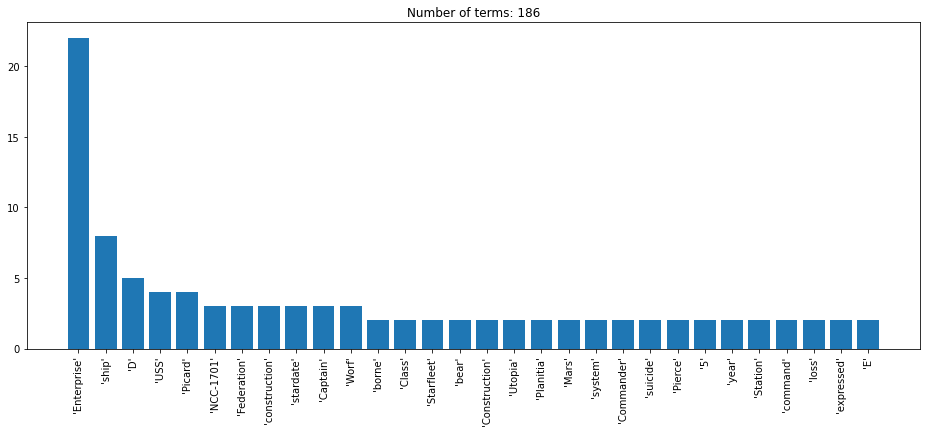

In [43]:
plot_words(['%r' % t.text for t in doc if not (t.is_stop | t.is_punct)])

### Check Part of Speech

In [44]:
## spaCy
for i, t in enumerate(doc):
    print('%2d|%-12r : %-5s %s' % (i+1, t.text, t.pos_, t.tag_))
    if t.text == '.':
        break

 1|'USS'        : PROPN NNP
 2|'Enterprise' : PROPN NNP
 3|'NCC-1701'   : PROPN NNP
 4|'-'          : PUNCT HYPH
 5|'D'          : PROPN NNP
 6|'For'        : ADP   IN
 7|'five'       : NUM   CD
 8|'hundred'    : NUM   CD
 9|'years'      : NOUN  NNS
10|'every'      : DET   DT
11|'ship'       : NOUN  NN
12|'that'       : DET   WDT
13|'has'        : AUX   VBZ
14|'borne'      : VERB  VBN
15|'the'        : DET   DT
16|'name'       : NOUN  NN
17|'of'         : ADP   IN
18|'the'        : DET   DT
19|'Enterprise' : NOUN  NN
20|'has'        : AUX   VBZ
21|'become'     : VERB  VBN
22|'a'          : DET   DT
23|'legend'     : NOUN  NN
24|'This'       : DET   DT
25|'one'        : NOUN  NN
26|'is'         : VERB  VBZ
27|'no'         : ADV   RB
28|'different'  : ADJ   JJ
29|'The'        : DET   DT
30|'USS'        : PROPN NNP
31|'Enterprise' : PROPN NNP
32|'NCC-1701'   : PROPN NNP
33|'-'          : PUNCT HYPH
34|'D'          : PROPN NNP
35|'was'        : VERB  VBD
36|'a'          : DET   DT
37|'24th

### Lemmatisation

In [45]:
## spaCy
print('i | Token        Lemma')
print('--| ------------ ------------')
for i, t in enumerate(doc):
    print('%2d| %-12r %r' % (i+1, t.text, t.lemma_))
    if t.text == '.':
        break

i | Token        Lemma
--| ------------ ------------
 1| 'USS'        'USS'
 2| 'Enterprise' 'Enterprise'
 3| 'NCC-1701'   'NCC-1701'
 4| '-'          '-'
 5| 'D'          'D'
 6| 'For'        'for'
 7| 'five'       'five'
 8| 'hundred'    'hundred'
 9| 'years'      'year'
10| 'every'      'every'
11| 'ship'       'ship'
12| 'that'       'that'
13| 'has'        'have'
14| 'borne'      'bear'
15| 'the'        'the'
16| 'name'       'name'
17| 'of'         'of'
18| 'the'        'the'
19| 'Enterprise' 'enterprise'
20| 'has'        'have'
21| 'become'     'become'
22| 'a'          'a'
23| 'legend'     'legend'
24| 'This'       'this'
25| 'one'        'one'
26| 'is'         'be'
27| 'no'         'no'
28| 'different'  'different'
29| 'The'        'the'
30| 'USS'        'USS'
31| 'Enterprise' 'Enterprise'
32| 'NCC-1701'   'NCC-1701'
33| '-'          '-'
34| 'D'          'D'
35| 'was'        'be'
36| 'a'          'a'
37| '24th'       '24th'
38| 'century'    'century'
39| 'United'     'United'


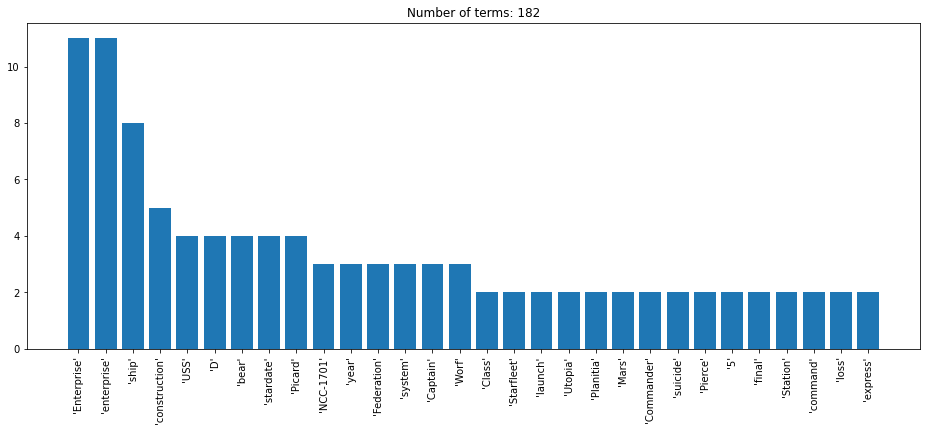

In [46]:
plot_words(['%r' % t.lemma_ for t in doc if not (t.is_stop | t.is_punct)])

### Entity Recognition

In [47]:
## spaCy
for i, s in enumerate(doc.sents):
    print('%2d: %s' % (i, re.sub(r'\n+', '', s.text)))
    if s.as_doc().ents:
        print('-'*80)
        for e in s.as_doc().ents:
            print('%-11s: %s' % (e.label_, re.sub(r'\n+', '', e.text)))
    print('='*80)

 0: USS Enterprise NCC-1701-D
 1: For five hundred years every ship that has borne the name of the Enterprise has become a legend This one is no different The USS Enterprise NCC-1701-D was a 24th century United Federation of Planets Galaxy Class starship operated by Starfleet and the fifth Federation ship to bear the name Enterprise During her career the Enterprise served as the Federation flagship The Enterprise was destroyed during the Battle of Veridian III in 2371 History Construction and launch The Enterprise was built at Utopia Planitia Fleet Yards orbiting Mars in the Solar system
--------------------------------------------------------------------------------
DATE       : five hundred years
ORG        : Enterprise
PRODUCT    : The USS Enterprise NCC-1701-D
ORG        : United Federation of Planets Galaxy Class
ORG        : Starfleet
ORG        : Enterprise
ORG        : Enterprise
EVENT      : the Battle of Veridian III
ORG        : Enterprise
ORG        : Utopia Planitia Fleet 

## Extra: Using NLTK for NLP

### Tokenise

In [48]:
import nltk

In [49]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\zhiwe\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [50]:
# use nltk to find tokens
tokens = nltk.word_tokenize(text)

for i, t in enumerate(tokens[:25]):
    print('%2d| %r' % (i+1, t))

 1| 'USS'
 2| 'Enterprise'
 3| 'NCC-1701-D'
 4| 'For'
 5| 'five'
 6| 'hundred'
 7| 'years'
 8| 'every'
 9| 'ship'
10| 'that'
11| 'has'
12| 'borne'
13| 'the'
14| 'name'
15| 'of'
16| 'the'
17| 'Enterprise'
18| 'has'
19| 'become'
20| 'a'
21| 'legend'
22| 'This'
23| 'one'
24| 'is'
25| 'no'


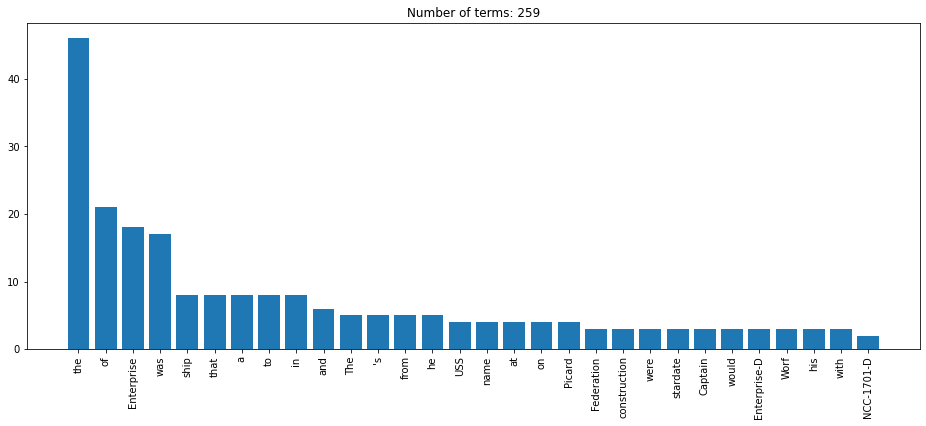

In [51]:
plot_words(tokens)

### Stop words

In [52]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\zhiwe\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [53]:
stopWords = nltk.corpus.stopwords.words('english')

stopWords.sort()
print(', '.join(stopWords))

a, about, above, after, again, against, ain, all, am, an, and, any, are, aren, aren't, as, at, be, because, been, before, being, below, between, both, but, by, can, couldn, couldn't, d, did, didn, didn't, do, does, doesn, doesn't, doing, don, don't, down, during, each, few, for, from, further, had, hadn, hadn't, has, hasn, hasn't, have, haven, haven't, having, he, her, here, hers, herself, him, himself, his, how, i, if, in, into, is, isn, isn't, it, it's, its, itself, just, ll, m, ma, me, mightn, mightn't, more, most, mustn, mustn't, my, myself, needn, needn't, no, nor, not, now, o, of, off, on, once, only, or, other, our, ours, ourselves, out, over, own, re, s, same, shan, shan't, she, she's, should, should've, shouldn, shouldn't, so, some, such, t, than, that, that'll, the, their, theirs, them, themselves, then, there, these, they, this, those, through, to, too, under, until, up, ve, very, was, wasn, wasn't, we, were, weren, weren't, what, when, where, which, while, who, whom, why, w

In [56]:
# ANSWER
# NOTE: see the `.lower()` method applied to token
tokens_no_stop = [t for t in tokens if t.lower() not in stopWords] # create a list of tokens withOUT the stop words 

In [57]:
## NLTK
i = 0
j = 0

print('i | with stop words without')
print('--| --------------- ------------')

# for all the tokens
while i < len(tokens):
    # same word
    if tokens[i] == tokens_no_stop[j]:
        print('%2d| %-15r %r' % (i+1, tokens[i], tokens_no_stop[j]))
        j += 1
    # not the same word
    else:
        print('%2d| %-15r' % (i+1, tokens[i]))

    # next word
    i += 1
    # break after the first sentence
    if tokens[i-1] == '.':
        break

i | with stop words without
--| --------------- ------------
 1| 'USS'           'USS'
 2| 'Enterprise'    'Enterprise'
 3| 'NCC-1701-D'    'NCC-1701-D'
 4| 'For'          
 5| 'five'          'five'
 6| 'hundred'       'hundred'
 7| 'years'         'years'
 8| 'every'         'every'
 9| 'ship'          'ship'
10| 'that'         
11| 'has'          
12| 'borne'         'borne'
13| 'the'          
14| 'name'          'name'
15| 'of'           
16| 'the'          
17| 'Enterprise'    'Enterprise'
18| 'has'          
19| 'become'        'become'
20| 'a'            
21| 'legend'        'legend'
22| 'This'         
23| 'one'           'one'
24| 'is'           
25| 'no'           
26| 'different'     'different'
27| 'The'          
28| 'USS'           'USS'
29| 'Enterprise'    'Enterprise'
30| 'NCC-1701-D'    'NCC-1701-D'
31| 'was'          
32| 'a'            
33| '24th'          '24th'
34| 'century'       'century'
35| 'United'        'United'
36| 'Federation'    'Federation'
37| 'of'    

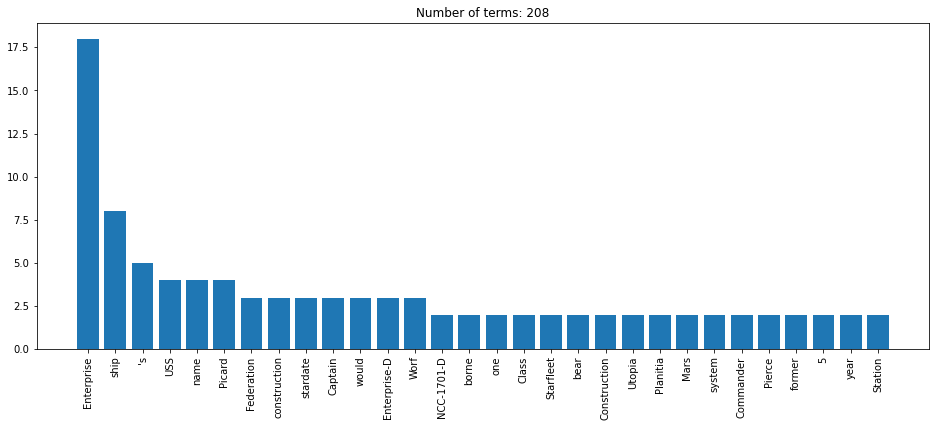

In [59]:
# Create plot of words without stopword
# ANSWER
plot_words(tokens_no_stop)

### Check Part of Speech

In [60]:
# define PoS
pos_list = {
    'CC':   'coordinating conjunction',
    'CD':   'cardinal digit',
    'DT':   'determiner',
    'EX':   'existential there (like: "there is" ... think of it like "there exists")',
    'FW':   'foreign word',
    'IN':   'preposition/subordinating conjunction',
    'JJ':   'adjective "big"',
    'JJR':  'adjective, comparative "bigger"',
    'JJS':  'adjective, superlative "biggest"',
    'LS':   'list marker 1)',
    'MD':   'modal could, will',
    'NN':   'noun, singular "desk"',
    'NNS':  'noun plural "desks"',
    'NNP':  'proper noun, singular "Harrison"',
    'NNPS': 'proper noun, plural "Americans"',
    'PDT':  'predeterminer "all the kids"',
    'POS':  'possessive ending parent"s',
    'PRP':  'personal pronoun I, he, she',
    'PRP$': 'possessive pronoun my, his, hers',
    'RB':   'adverb very, silently,',
    'RBR':  'adverb, comparative better',
    'RBS':  'adverb, superlative best',
    'RP':   'particle give up',
    'TO':   'to go "to" the store.',
    'UH':   'interjection errrrrrrrm',
    'VB':   'verb, base form take',
    'VBD':  'verb, past tense took',
    'VBG':  'verb, gerund/present participle taking',
    'VBN':  'verb, past participle taken',
    'VBP':  'verb, sing. present, non-3d take',
    'VBZ':  'verb, 3rd person sing. present takes',
    'WDT':  'wh-determiner which',
    'WP':   'wh-pronoun who, what',
    'WP$':  'possessive wh-pronoun whose',
    'WRB':  'wh-abverb where, when',
}

In [62]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\zhiwe\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


True

In [63]:
## nltk
tagged = nltk.pos_tag(tokens)

for i, t in enumerate(tagged[:25]):
    print('%2d|%-12r : %-4s %s' % (i+1, t[0], t[1], (pos_list[t[1]] if t[1] in pos_list else '-')))

 1|'USS'        : NNP  proper noun, singular "Harrison"
 2|'Enterprise' : NNP  proper noun, singular "Harrison"
 3|'NCC-1701-D' : NNP  proper noun, singular "Harrison"
 4|'For'        : IN   preposition/subordinating conjunction
 5|'five'       : CD   cardinal digit
 6|'hundred'    : CD   cardinal digit
 7|'years'      : NNS  noun plural "desks"
 8|'every'      : DT   determiner
 9|'ship'       : NN   noun, singular "desk"
10|'that'       : WDT  wh-determiner which
11|'has'        : VBZ  verb, 3rd person sing. present takes
12|'borne'      : VBN  verb, past participle taken
13|'the'        : DT   determiner
14|'name'       : NN   noun, singular "desk"
15|'of'         : IN   preposition/subordinating conjunction
16|'the'        : DT   determiner
17|'Enterprise' : NNP  proper noun, singular "Harrison"
18|'has'        : VBZ  verb, 3rd person sing. present takes
19|'become'     : VBN  verb, past participle taken
20|'a'          : DT   determiner
21|'legend'     : RBR  adverb, comparative b

### Stemming

In [64]:
## nltk
ps = nltk.porter.PorterStemmer()
stemmed = ' '.join([ps.stem(word) for word in text.split()])

### Lemmatisation

In [66]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\zhiwe\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

In [71]:
## nltk
wl = nltk.stem.WordNetLemmatizer()
lemma = ' '.join([wl.lemmatize(word) for word in text.split()])

In [72]:
## nltk
dot = stemmed.find('.') + 1
sl = stemmed[:dot].split()
dot = lemma.find('.') + 1
ll = lemma[:dot].split()

print('i | Stem           Lemma')
print('--| -------------- ------------')
for i, p in enumerate(zip(sl, ll)):
    print('%2d| %-12r   %-12r' % (i+1, p[0], p[1]))

i | Stem           Lemma
--| -------------- ------------


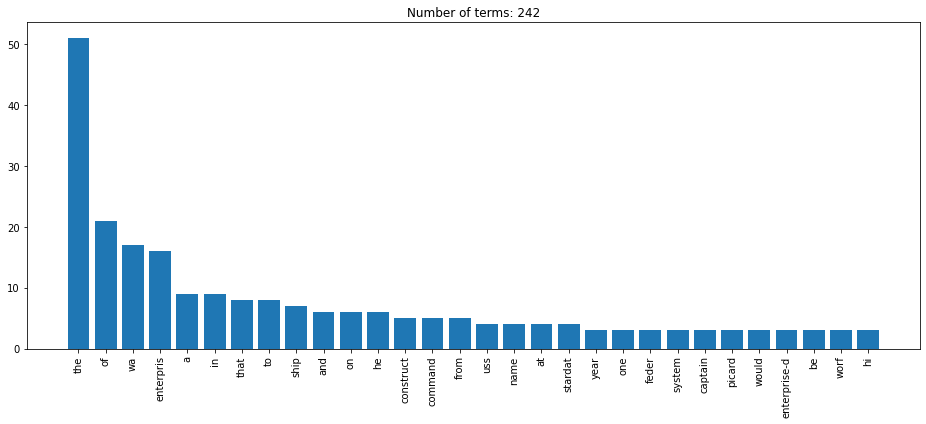

In [73]:
plot_words(stemmed.split())

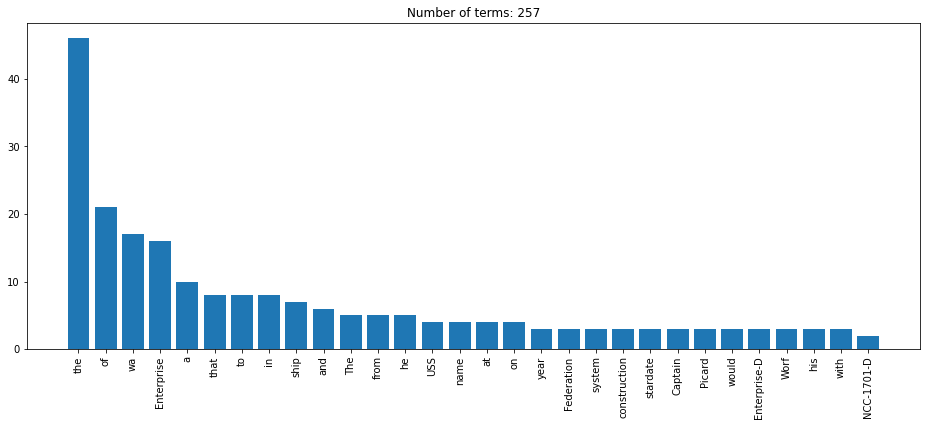

In [74]:
plot_words(lemma.split())

### Entity Recognition

In [76]:
nltk.download('maxent_ne_chunker')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\zhiwe\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping chunkers\maxent_ne_chunker.zip.


True

In [79]:
nltk.download('words')

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\zhiwe\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\words.zip.


True

In [80]:
## nltk
entities = nltk.chunk.ne_chunk(tagged)

for e in entities:
    s = re.sub(r'[\(\)]', '', str(e))
    if s.find('/NNP') > 0:
        t = s.split()[0]
        n = ' '.join([re.sub(r'/NNP', '', x) for x in s.split()[1:]])
        print('%-12s: %s' % (t, n))

ORGANIZATION: USS Enterprise
ORGANIZATION: Enterprise
ORGANIZATION: USS Enterprise
PERSON      : United Federation
ORGANIZATION: Planets Galaxy
PERSON      : Starfleet
ORGANIZATION: Enterprise
ORGANIZATION: Federation
ORGANIZATION: Enterprise
ORGANIZATION: Battle
GPE         : Veridian
ORGANIZATION: Enterprise
ORGANIZATION: Utopia Planitia Fleet
PERSON      : Mars
ORGANIZATION: Solar
ORGANIZATION: Commander Orfil Quinteros
PERSON      : Brahms
ORGANIZATION: Enterprise
ORGANIZATION: Enterprise
ORGANIZATION: USS
ORGANIZATION: Utopia
PERSON      : Walter Pierce
PERSON      : Marla Finn
PERSON      : William Hodges
PERSON      : Pierce
ORGANIZATION: Enterprise
PERSON      : Mars
ORGANIZATION: Enterprise
FACILITY    : Earth Station
ORGANIZATION: McKinley Captain
PERSON      : Picard
ORGANIZATION: Rear Admiral Norah Satie Legacy
PERSON      : Riker
ORGANIZATION: Enterprise
PERSON      : Picard
ORGANIZATION: Enterprise
PERSON      : Deep Space
PERSON      : Starfleet Station
PERSON      : Cap



---



---



> > > > > > > > > © 2021 Institute of Data


---



---



